In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns',None)
dataset = pd.read_csv('train.csv')

In [6]:
print(dataset.shape)

(891, 12)


In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

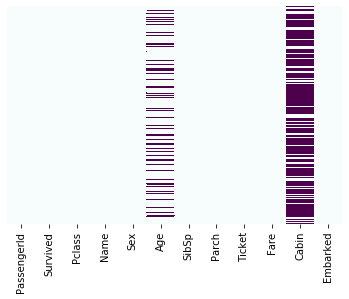

In [11]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

In [17]:
dataset['Age'].isnull().sum()

177

In [16]:
dataset['Cabin'].isnull().sum()

687

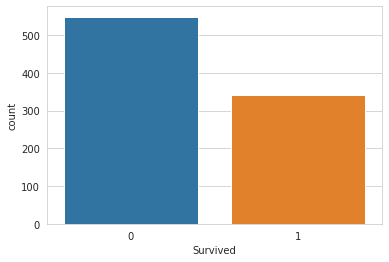

In [19]:
##checking how many  people survived 
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dataset)

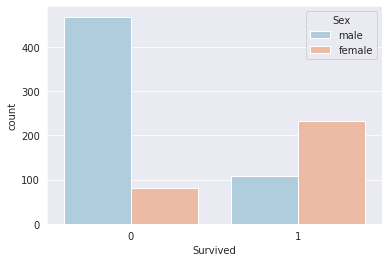

In [21]:
##counting the number of male and female survived
sns.set_style("darkgrid")
sns.countplot(x='Survived',hue='Sex',data=dataset,palette='RdBu_r')

In [25]:
print(dataset['Pclass'].unique())

[3 1 2]


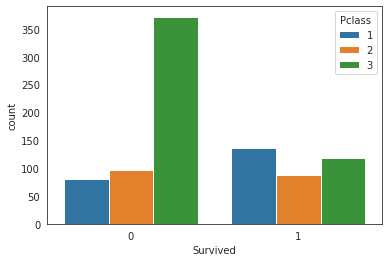

In [26]:
sns.set_style("white")
sns.countplot(x='Survived',hue='Pclass',data=dataset,palette='tab10')


In [27]:
print(dataset['SibSp'].unique())

[1 0 3 4 2 5 8]


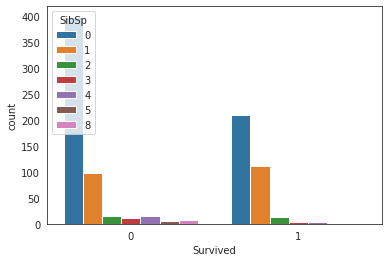

In [34]:
sns.countplot(x='Survived',hue='SibSp',data=dataset,palette='tab10')

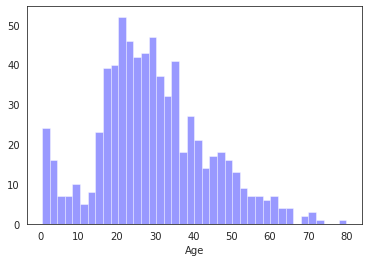

In [35]:
##we don't need the probability density function so we set kernel density estimator (KDE) to False
##The Probability Density Function(PDF) is the probability function which is represented 
##for the density of a continuous random variable lying between a certain range of values
sns.distplot(dataset['Age'].dropna(),kde=False,color='blue',bins=40)

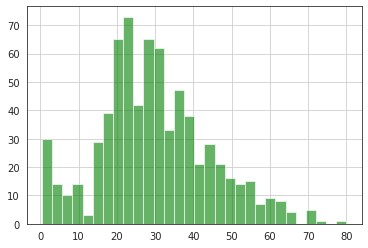

In [36]:
dataset['Age'].hist(bins=30,color='green',alpha=0.6)

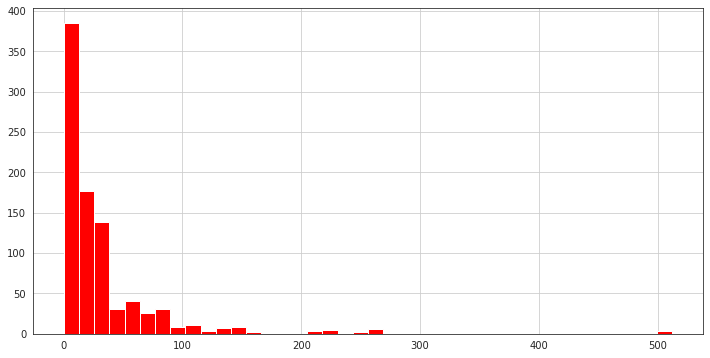

In [39]:
dataset['Fare'].hist(color='red',bins=40,figsize=(12,6))

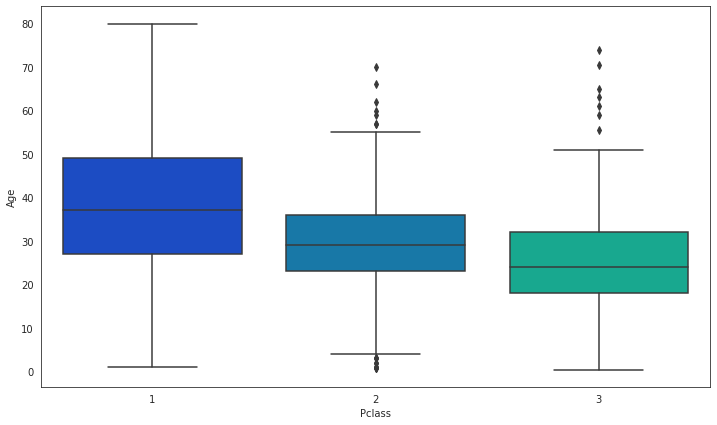

In [40]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [41]:
##here we can see age above 25 are in pclass 1 . and the respective mean age of the three different class

In [42]:
##creating the function to flll the nan values in age column
def mean_age_distribute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else :
            return 25
    else:
        return Age

In [43]:
dataset['Age'] = dataset[['Age','Pclass']].apply(mean_age_distribute,axis=1)

In [45]:
dataset['Age'].isnull().sum()

0

In [46]:
dataset.drop('Cabin',axis=1,inplace=True)

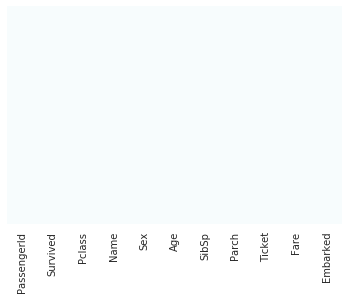

In [47]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

In [48]:
dataset.dropna(inplace=True)

In [49]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
##converting categorical feature using get_dummies
pd.get_dummies(dataset['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [54]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [55]:
##dropping sex and embarked column since they are already converted numerical features and we don't need Name and ticket features
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
##joining those categorical features
dataset =  pd.concat([dataset,sex,embark],axis=1)

In [57]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
##now our dataset is ready and good for implementation of model ,we are using here logistic regression
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1), 
                                                    dataset['Survived'], test_size=0.30, 
                                                    random_state=100)

In [60]:
X_train.shape , y_train.shape

((622, 9), (622,))

In [61]:
##now applying the model
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
##checking the accuracy for best bit using confusion matrix
from sklearn.metrics import confusion_matrix

In [65]:
accuracy=confusion_matrix(y_test,predictions)

In [66]:
accuracy

array([[140,  20],
       [ 49,  58]])

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7415730337078652

In [69]:
##model is 74% accurate
##now checking  precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       160
           1       0.74      0.54      0.63       107

    accuracy                           0.74       267
   macro avg       0.74      0.71      0.71       267
weighted avg       0.74      0.74      0.73       267

